In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

%matplotlib inline

# Cargamos el modelo y el test final

In [2]:
modelo = pd.read_csv('csv_files/modelo_final.csv')
test_final = pd.read_csv('csv_files/test_final.csv')

/home/mariano/ENTER/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
994585,1112351903,EzZwww6,4.0,2,2.0,0.0,<p>Se busca encargado para importante fiambrer...,10,4,3,Ventas,1.0
550278,1112246646,1QP6pRz,3.0,2,4.0,0.0,"<p align=""center"">Importante Empresa Multinaci...",10,2,3,Jóvenes Profesionales,1.0
720632,1112094756,6r5P06l,1.0,1,3.0,0.0,<p>Seleccionaremos para Importante Entidad Ban...,9,3,3,Call Center,1.0
388656,1112458919,96Xk6Aw,2.0,1,4.0,0.0,<p>Somos la empresa de retail #1 en el mundo y...,10,0,2,Comercial,0.0
498981,1112470793,N5mjDL,4.0,2,4.0,1.0,"<p style="""">Nos orientamos a un profesional de...",10,3,3,Marketing,0.0


In [4]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
idaviso            1000000 non-null int64
idpostulante       1000000 non-null object
rango_edad         1000000 non-null float64
sexo               1000000 non-null int64
nivel_estudios     1000000 non-null float64
esta_estudiando    1000000 non-null float64
descripcion        1000000 non-null object
tipo_de_trabajo    1000000 non-null int64
nivel_laboral      1000000 non-null int64
nombre_zona        1000000 non-null object
nombre_area        1000000 non-null object
sepostulo          1000000 non-null float64
dtypes: float64(4), int64(4), object(4)
memory usage: 91.6+ MB


In [5]:
test_final.sample(5)

,id,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area
50709,50709,1112440445,ZZLAKZ,3.0,1.0,5.0,0.0,Analista Sr de Políticas de Crédito,10.0,3.0,3.0,Análisis de Riesgos
79247,79247,1112464667,e3wOaW,2.0,1.0,6.0,1.0,Analista SSr de Selección y Gestión del Talent...,10.0,3.0,3.0,Selección
50603,50603,1112440357,ZPxYj5,3.0,1.0,3.0,0.0,EJECUTIVO DE VENTAS  MAR DEL PLATA,10.0,3.0,3.0,Comercial
85995,85995,1112466706,4rWJqOe,3.0,2.0,2.0,0.0,Operario para planta fibra Optica,10.0,3.0,3.0,Producción
77441,77441,1112464349,1DMj9b,3.0,1.0,4.0,0.0,Administrativa de cuentas por cobrar - Luján d...,10.0,3.0,3.0,Administración


In [6]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null float64
sexo               100000 non-null float64
nivel_estudios     100000 non-null float64
esta_estudiando    100000 non-null float64
titulo             95552 non-null object
tipo_de_trabajo    100000 non-null float64
nivel_laboral      100000 non-null float64
nombre_zona        100000 non-null float64
nombre_area        95552 non-null object
dtypes: float64(7), int64(2), object(3)
memory usage: 9.2+ MB


Nos guardamos en un dataframe alternativo todos los registros con postulaciones efectivas del postulante al aviso en cuestión.

In [7]:
si = modelo['sepostulo'] == 1
no = modelo['sepostulo'] == 0
modelo_si = modelo[si]
modelo_no = modelo[no]

# Correlación de Pearson entre los features

Text(0.5,1,'Correlación de Pearson entre los features')

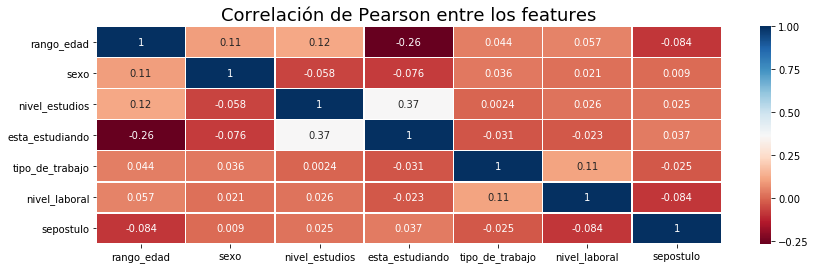

In [8]:
modelo_features = modelo[['rango_edad', 'sexo', 'nivel_estudios', 'esta_estudiando',\
                          'tipo_de_trabajo', 'nivel_laboral', 'sepostulo']]

fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(modelo_features.astype(float).corr(), cmap=plt.cm.RdBu, robust=False, annot=True,\
                      linewidths=.5, linecolor='white', ax=ax)

heatmap.set_title('Correlación de Pearson entre los features', fontsize=18)

# Features de avisos vs Features de postulantes

En esta sección, realizamos "enfrentamientos" entre distintos features de los avisos con distintos features de los postulantes.

En un principio, la idea fue lograr una tabla que mostrara en porcentajes la cantidad de registros en los que se cumplía cada combinación de valores entre los dos features. De esta forma, creamos un nuevo feature que contenía el peso (porcentaje) de la combinación que se daba en el registro en cuestión. Cuando llevamos esto a los algoritmos de ML, los resultados empeoraron, por lo cual decidimos dejarlo de lado.

Luego, en vez de analizar todas las combinaciones de valores para cada par de features, le dimos importancia a aquellas relaciones que más peso tenían. Es decir, que a priori parecían influir en la decisión de un postulante de postularse o no a un cierto aviso. Por más fino que fue el análisis, los resultados tampoco mejoraron y, nuevamente, lo dejamos de lado.

Sin embargo, a continuación, mostramos los procedimientos realizados, ya que los consideramos importantes en el desarrollo del TP.

## Nivel de estudios vs Nivel laboral

Nivel de estudios:
- 1 = Otro
- 2 = Secundario
- 3 = Terciario/Técnico
- 4 = Universitario
- 5 = Posgrado
- 6 = Master
- 7 = Doctorado

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

Creamos un dataframe con porcentajes por columnas. De esta forma, el heatmap nos mostrará mejor la incidencia de cada nivel de estudios para cada nivel laboral.

In [9]:
estudios_vs_laboral_si = pd.crosstab(modelo_si['nivel_laboral'], modelo_si['nivel_estudios'], normalize='columns')
estudios_vs_laboral_si

nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
0,0.019214,0.020397,0.021952,0.025466,0.027915,0.028381,0.026746
1,0.113537,0.106819,0.086819,0.067034,0.047005,0.040030,0.066865
2,0.175546,0.201669,0.217929,0.238409,0.165488,0.155671,0.164933
3,0.670306,0.651948,0.644958,0.626690,0.651875,0.634121,0.649331
4,0.016157,0.016756,0.023733,0.034400,0.078488,0.091496,0.059435
5,0.005240,0.002411,0.004609,0.008000,0.029230,0.050302,0.032689


Text(105,0.5,'Nivel laboral')

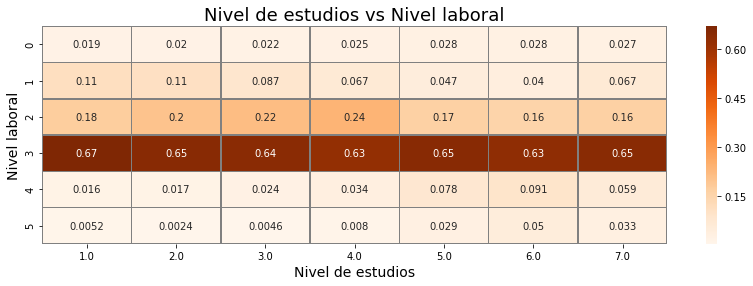

In [10]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_si, cmap='Oranges', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

#### Analizamos las no postulaciones

In [11]:
estudios_vs_laboral_no = pd.crosstab(modelo_no['nivel_laboral'], modelo_no['nivel_estudios'], normalize='columns')
estudios_vs_laboral_no

nivel_estudios,1.0,2.0,3.0,4.0,5.0,6.0,7.0
nivel_laboral,,,,,,,
0,0.013899,0.012853,0.012917,0.013293,0.014277,0.013708,0.012894
1,0.072475,0.077774,0.079915,0.077921,0.078708,0.075854,0.075931
2,0.151899,0.163154,0.162701,0.163977,0.167094,0.166713,0.161891
3,0.690494,0.673748,0.670306,0.670773,0.670196,0.675188,0.673352
4,0.057583,0.059979,0.061861,0.061137,0.056678,0.055756,0.060172
5,0.013651,0.012492,0.012300,0.012899,0.013047,0.012781,0.015759


Text(105,0.5,'Nivel laboral')

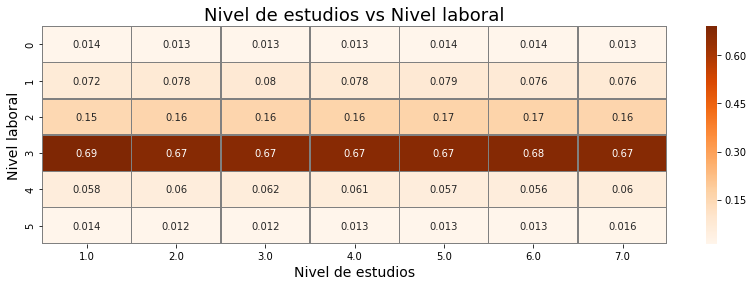

In [12]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudios_vs_laboral_no, cmap='Oranges', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Nivel de estudios vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel de estudios', fontsize=14)
heatmap.set_ylabel('Nivel laboral', fontsize=14)

#### Conclusión

Ambos heatmaps son muy similares. No encontramos relaciones inversas entre uno y otro. Esto quiere decir que la combinación entre el nivel de estudios del postulante y el nivel laboral del aviso no influyen en la decisión de postularse o no.

## Esta estudiando vs Tipo de trabajo

Esta estudiando:
- 0 = Está graduado o abandonó
- 1 = Tiene un título en curso

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

#### Analizamos las postulaciones

In [13]:
estudiando_vs_tipo_trabajo_si = pd.crosstab(modelo_si['esta_estudiando'], modelo_si['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_si

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.666667,0.526316,0.678873,0.636238,0.672241,0.272877,0.71625,0.608779,0.53484,0.65041
1.0,0.333333,0.473684,0.321127,0.363762,0.327759,0.727123,0.28375,0.391221,0.46516,0.34959


Text(105,0.5,'Esta estudiando')

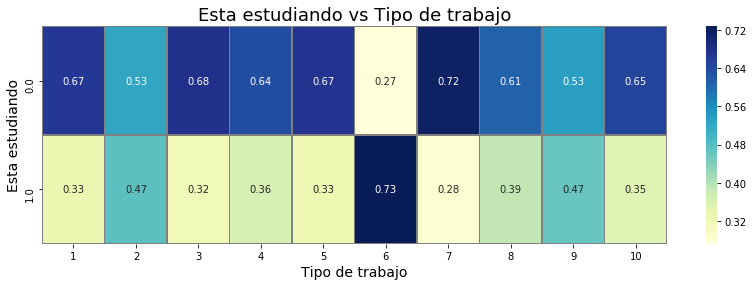

In [14]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_si, cmap='YlGnBu', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

#### Analizamos las no postulaciones

In [15]:
estudiando_vs_tipo_trabajo_no = pd.crosstab(modelo_no['esta_estudiando'], modelo_no['tipo_de_trabajo'], normalize='columns')
estudiando_vs_tipo_trabajo_no

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
esta_estudiando,,,,,,,,,,
0.0,0.52381,0.705882,0.624277,0.672297,0.663978,0.675755,0.655059,0.667347,0.67139,0.668384
1.0,0.47619,0.294118,0.375723,0.327703,0.336022,0.324245,0.344941,0.332653,0.32861,0.331616


Text(105,0.5,'Esta estudiando')

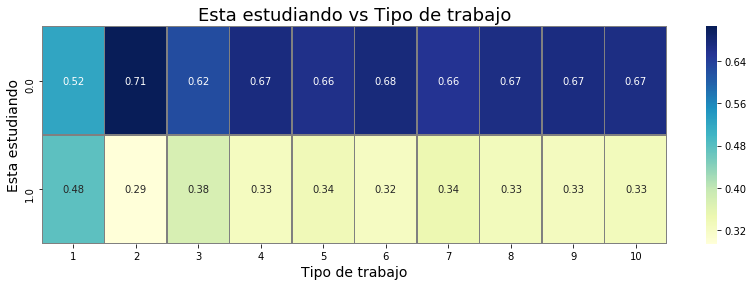

In [16]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(estudiando_vs_tipo_trabajo_no, cmap='YlGnBu', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Esta estudiando vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Esta estudiando', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos una única relación inversa entre ambos:
- Si un postulante no está estudiando, es poco probable que se postule a una pasantía (tipo_de_trabajo = 6)
- Si un postulante está estudiando, es muy probable que se postule a una pasantía (tipo_de_trabajo = 6)

Creamos entonces el feature que indica esta relación.

In [17]:
relacion = (modelo['esta_estudiando'] == 1) & (modelo['tipo_de_trabajo'] == 6)

#modelo.loc[(relacion), 'estudia_vs_tipo_de_trabajo'] = 1
#modelo.loc[(~relacion), 'estudia_vs_tipo_de_trabajo'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
277786,1112405931,xkdDjRa,4.0,1,5.0,0.0,<p>Para importante industria con amplia trayec...,10,3,3,Diseño Industrial,0.0
169606,1112251086,MVzoeP3,1.0,2,4.0,1.0,"<div style=""""><div style=""""><p style="""">The UN...",10,4,3,Administración,0.0
127906,1112472232,kPLA1eb,2.0,2,2.0,0.0,"<p style="""">Seleccionaremos para la Dirección ...",10,3,3,Comercial,0.0
161774,1112134354,0zPAv0q,1.0,1,4.0,1.0,<p>Grupo Cosmos Recursos Humanos es una compañ...,10,3,3,Recepcionista,0.0
263692,1112208597,jkVKk8Q,2.0,1,4.0,1.0,"<p><span style="""">Nos encontramos en la búsque...",10,3,3,Producción,0.0


## Rango de edad vs Tipo de trabajo

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Tipo de trabajo:
- 1 = Voluntario
- 2 = Primer Empleo
- 3 = Fines de Semana
- 4 = Por Contrato
- 5 = Temporario
- 6 = Pasantia
- 7 = Por Horas
- 8 = Teletrabajo
- 9 = Part-time
- 10 = Full-time

#### Analizamos las postulaciones

In [18]:
edad_vs_tipo_trabajo_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_si

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.428571,0.736842,0.466197,0.247580,0.297659,0.625721,0.37500,0.417939,0.504757,0.314924
2.0,0.380952,0.116959,0.298592,0.311203,0.291639,0.248145,0.28875,0.261450,0.255768,0.303033
3.0,0.095238,0.099415,0.204225,0.325035,0.319064,0.109233,0.24625,0.251908,0.185622,0.279793
4.0,0.095238,0.046784,0.030986,0.116183,0.091639,0.016900,0.09000,0.068702,0.053854,0.102250


Text(105,0.5,'Rango edad')

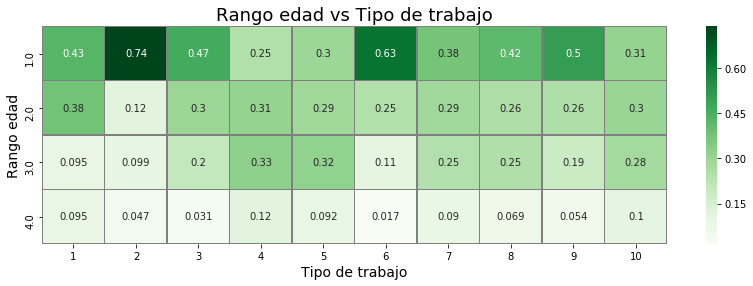

In [19]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_si, cmap='Greens', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Analizamos las no postulaciones

In [20]:
edad_vs_tipo_trabajo_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['tipo_de_trabajo'], normalize='columns')
edad_vs_tipo_trabajo_no

tipo_de_trabajo,1,2,3,4,5,6,7,8,9,10
rango_edad,,,,,,,,,,
1.0,0.380952,0.303922,0.314066,0.276464,0.316667,0.309564,0.290455,0.305085,0.302912,0.303868
2.0,0.238095,0.274510,0.275530,0.263514,0.241398,0.249581,0.264236,0.260159,0.253405,0.256898
3.0,0.285714,0.254902,0.256262,0.296171,0.287634,0.300336,0.295780,0.291811,0.290833,0.290616
4.0,0.095238,0.166667,0.154143,0.163851,0.154301,0.140520,0.149529,0.142945,0.152850,0.148618


Text(105,0.5,'Rango edad')

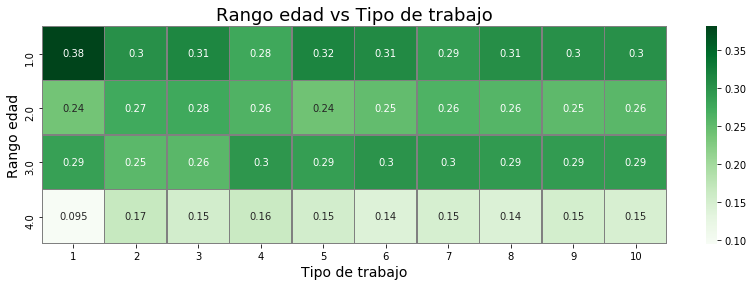

In [21]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_tipo_trabajo_no, cmap='Greens', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Tipo de trabajo', fontsize=18)
heatmap.set_xlabel('Tipo de trabajo', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos las siguientes relaciones inversas:
- Si un postulante tiene entre 18 y 25 años (rango_edad = 1), es muy probable que se postule a un primer empleo (tipo_de_trabajo = 2)
- Si un postulante no tiene entre 18 y 25 años (rango_edad =1), es poco probable que se postule a un primer emepleo (tipo_de_trabajo = 2) 

- Si un postulante tiene entre 18 y 25 años (rango_edad = 1), es bastante probable que se postule a una pasantía (tipo_de_trabajo = 6)
- Si un postulante no tiene entre 18 y 25 años (rango_edad =1), es menos probable que se postule a una pasantía (tipo_de_trabajo = 6)

Creamos entonces el feature que indica estas relaciones.

In [22]:
relacion = ((modelo['rango_edad'] == 1) & (modelo['tipo_de_trabajo'] == 2)) |\
           ((modelo['rango_edad'] == 1) & (modelo['tipo_de_trabajo'] == 6))

#modelo.loc[(relacion), 'edad_vs_tipo_de_trabajo'] = 1
#modelo.loc[(~relacion), 'edad_vs_tipo_de_trabajo'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
960262,1112305844,5mP54pk,3.0,1,3.0,0.0,"<p style=""""><strong>Adecco Office</strong> est...",10,3,3,Tesorería,1.0
421291,1112390398,JBd0JjJ,2.0,2,4.0,1.0,"<p><strong><span style=""text-decoration: under...",10,3,3,Seguridad,0.0
517097,1111644641,Z903jb,4.0,2,4.0,0.0,"<p>Farmacia Central Oeste, busca repositores p...",10,1,3,Ventas,1.0
735676,1112397204,1QreAY3,2.0,2,3.0,0.0,<p><strong>Adecco Office</strong> está especia...,10,3,3,Logística,1.0
559881,1112309561,ZOjzP8,2.0,1,3.0,0.0,<p>Nos encontramos en la búsqueda de una emple...,10,1,3,Administración,1.0


## Rango de edad vs Nombre zona

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nombre zona:
- 1 = Otros
- 2 = Capital Federal
- 3 = Gran Buenos Aires

#### Analizamos las postulaciones

In [23]:
edad_vs_zona_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['nombre_zona'], normalize='columns')
edad_vs_zona_si

nombre_zona,1,2,3,Corrientes
rango_edad,,,,
1.0,0.288040,0.353493,0.342246,0.137931
2.0,0.280962,0.295157,0.296233,0.241379
3.0,0.316348,0.260519,0.266225,0.413793
4.0,0.114650,0.090832,0.095296,0.206897


Text(105,0.5,'Rango edad')

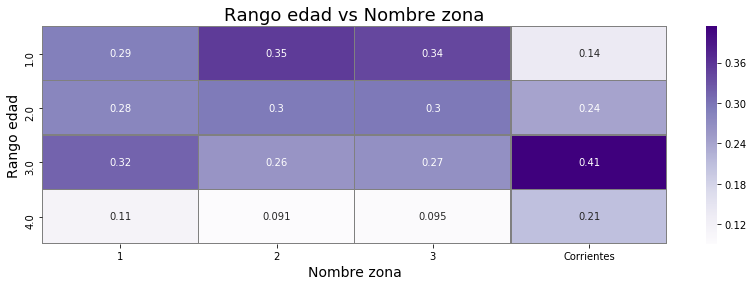

In [24]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_si, cmap='Purples', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Analizamos las no postulaciones

In [25]:
edad_vs_zona_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['nombre_zona'], normalize='columns')
edad_vs_zona_no

nombre_zona,1,2,3,1,2,3,Corrientes
rango_edad,,,,,,,
1.0,0.326531,0.304621,0.301414,0.303378,0.299554,0.304469,0.176471
2.0,0.257143,0.257890,0.255524,0.266216,0.262903,0.256199,0.411765
3.0,0.289796,0.292066,0.292363,0.293919,0.291208,0.290342,0.352941
4.0,0.126531,0.145423,0.150699,0.136486,0.146335,0.148990,0.058824


Text(105,0.5,'Rango edad')

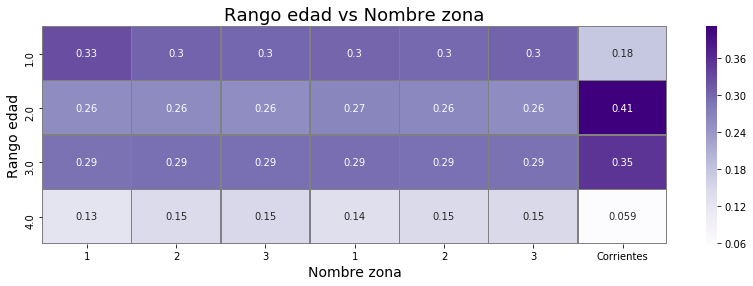

In [26]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_zona_no, cmap='Purples', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Rango edad vs Nombre zona', fontsize=18)
heatmap.set_xlabel('Nombre zona', fontsize=14)
heatmap.set_ylabel('Rango edad', fontsize=14)

#### Conclusión

No encontramos grandes diferencias entre ambos heatmaps. No podemos traducir esto a una relación binaria.

## Rango de edad vs Nivel laboral

Rango de edad:
- 1 = 18-25 
- 2 = 26-30
- 3 = 31-40
- 4 = 41-68

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

In [27]:
edad_vs_nivel_laboral_si = pd.crosstab(modelo_si['rango_edad'], modelo_si['nivel_laboral'], normalize='columns')
edad_vs_nivel_laboral_si

nivel_laboral,0,1,2,3,4,5
rango_edad,,,,,,
1.0,0.329886,0.388095,0.398470,0.331104,0.140005,0.099458
2.0,0.291734,0.290860,0.310245,0.296735,0.228611,0.164228
3.0,0.277406,0.242553,0.231219,0.274413,0.374453,0.339024
4.0,0.100975,0.078493,0.060066,0.097747,0.256931,0.397290


Text(105,0.5,'Edad')

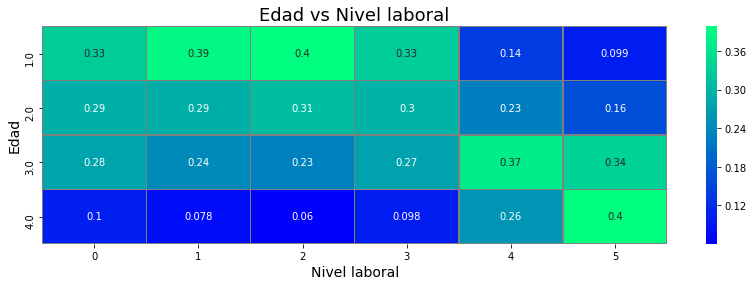

In [28]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_nivel_laboral_si, cmap='winter', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Edad vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Edad', fontsize=14)

#### Analizamos las no postulaciones

In [29]:
edad_vs_nivel_laboral_no = pd.crosstab(modelo_no['rango_edad'], modelo_no['nivel_laboral'], normalize='columns')
edad_vs_nivel_laboral_no

nivel_laboral,0,1,2,3,4,5
rango_edad,,,,,,
1.0,0.288865,0.303930,0.301500,0.304986,0.300532,0.296203
2.0,0.273958,0.255793,0.258249,0.255977,0.260047,0.244998
3.0,0.289930,0.292511,0.289715,0.290302,0.292606,0.303450
4.0,0.147247,0.147766,0.150536,0.148735,0.146815,0.155349


Text(105,0.5,'Edad')

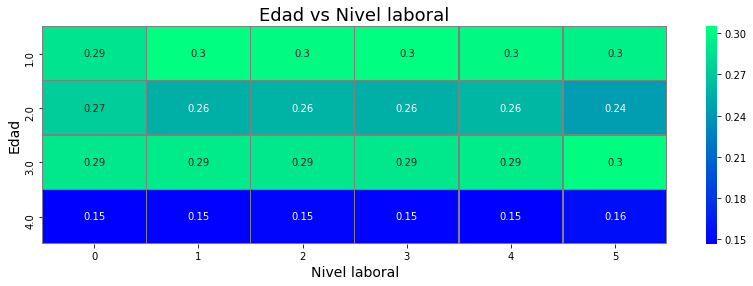

In [30]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(edad_vs_nivel_laboral_no, cmap='winter', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Edad vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Edad', fontsize=14)

#### Conclusión

Luego de analizar ambos heatmaps, notamos la siguiente relación inversa bastante marcada:
- Si un postulante tiene entre 41 y 68 años (rango_edad = 4), es bastante probable que se postule a un aviso de gerencia (nivel_laboral = 5)
- Si un postulante no tiene entre 41 y 68 años (rango_edad = 4), es menos probable que se postule a un aviso de gerencia (nivel_laboral = 5)

Creamos entonces el feature que indica esta relación.

In [31]:
relacion = ((modelo['rango_edad'] == 4) & (modelo['nivel_laboral'] == 5))

#modelo.loc[(relacion), 'edad_vs_nivel_laboral'] = 1
#modelo.loc[(~relacion), 'edad_vs_nivel_laboral'] = 0

modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo
718888,1112437193,OqrpXpv,2.0,1,6.0,1.0,"<p style=""""><strong style=""""><span style="""">Ob...",10,3,3,Tecnologia / Sistemas,1.0
762151,1111870627,X9xdWGd,2.0,2,3.0,0.0,<p>Importante Industria dedicada a la elaborac...,10,3,3,Producción,1.0
78796,1112275157,YR9Ddr,4.0,2,4.0,0.0,VENDEDORES para Tienda Lomas de Zamora Jorna...,9,2,3,Ventas,0.0
486140,1112264344,52KZYZ,4.0,2,4.0,0.0,<p>Para importante empresa con oficina comerci...,10,3,3,Ventas,0.0
624154,1112349392,6pNEaM,3.0,2,2.0,0.0,<p><strong>¡Estamos buscando nuevos talentos p...,10,2,3,Logística,1.0


## Sexo vs Nivel laboral

Sexo:
- 0 = 'NO_DECLARA'
- 1 = 'FEM'
- 2 = 'MASC'

Nivel laboral:
- 1 = Otro
- 2 = Junior
- 3 = Senior / Semi-Senior
- 4 = Jefe / Supervisor / Responsable
- 5 = Gerencia / Alta Gerencia / Dirección

#### Analizamos las postulaciones

In [32]:
sexo_vs_nivel_laboral_si = pd.crosstab(modelo_si['sexo'], modelo_si['nivel_laboral'], normalize='columns')
sexo_vs_nivel_laboral_si

nivel_laboral,0,1,2,3,4,5
sexo,,,,,,
0,0.001526,0.001465,0.001778,0.001665,0.001857,0.002981
1,0.504790,0.534778,0.548821,0.516860,0.315029,0.288076
2,0.493684,0.463757,0.449401,0.481475,0.683114,0.708943


Text(105,0.5,'Sexo')

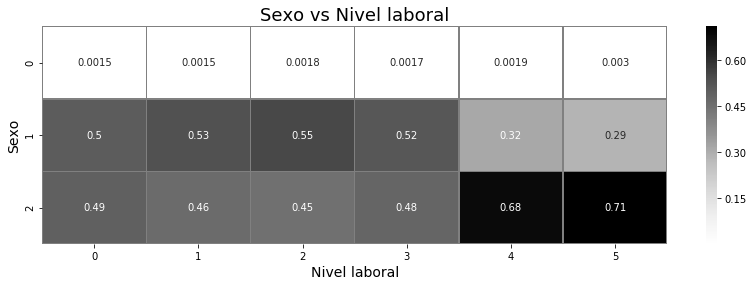

In [33]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(sexo_vs_nivel_laboral_si, cmap='Greys', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Sexo vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Sexo', fontsize=14)

#### Analizamos las no postulaciones

In [34]:
sexo_vs_nivel_laboral_no = pd.crosstab(modelo_no['sexo'], modelo_no['nivel_laboral'], normalize='columns')
sexo_vs_nivel_laboral_no

nivel_laboral,0,1,2,3,4,5
sexo,,,,,,
0,0.001217,0.002279,0.002421,0.002274,0.002312,0.002363
1,0.516733,0.525310,0.522292,0.525761,0.530066,0.517252
2,0.482051,0.472411,0.475288,0.471965,0.467622,0.480384


Text(105,0.5,'Sexo')

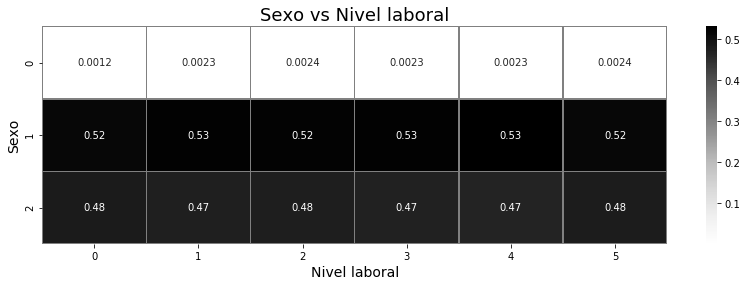

In [35]:
fig, ax = plt.subplots(figsize=(14,4))
heatmap = sns.heatmap(sexo_vs_nivel_laboral_no, cmap='Greys', robust=False, annot=True,\
                      linewidths=.5, linecolor='grey', ax=ax)

heatmap.set_title('Sexo vs Nivel laboral', fontsize=18)
heatmap.set_xlabel('Nivel laboral', fontsize=14)
heatmap.set_ylabel('Sexo', fontsize=14)

#### Conclusión

No encontramos grandes diferencias entre ambos heatmaps. No podemos traducir esto a una relación binaria.

# Relación entre las distintas áreas

La idea es encontrar relaciones fuertes entre las distintas áreas de los avisos laborales. Para esto, comenzamos por analizar las áreas a las que se postuló cada postulante.

Cabe destacar que únicamente nos interesa si el postulante se postuló o no a una cierta área: no influye la cantidad de veces que lo hizo.

In [36]:
# Eliminamos las postulaciones duplicadas de un mismo postulante a una misma área
modelo_areas = modelo_si.drop_duplicates(['idpostulante','nombre_area'])

# Creamos un diccionario del estilo {idpostulante:[areas_a_las_que_se_postulo]}
dic_id_area = {}
for index, row in modelo_areas.iterrows():
    area = row['nombre_area']
    idpostulante = row['idpostulante']
    if (idpostulante not in dic_id_area):
        dic_id_area[idpostulante] = [area]
    else:
        if (area not in dic_id_area[idpostulante]):
            dic_id_area[idpostulante].append(area)

Creamos una lista de listas. Cada sublista contiene las areas a las que se postuló cada postulante. Ya no nos interesa el idpostulante, sino las areas en común.

NOTA: tomamos listas de mas de un elemento y menos de 8, ya que luego calcularemos todas las duplas
posibles para cada lista. Considerar que 7C2 = 21 duplas como máximo por lista.

In [37]:
lista_areas = []
for id in dic_id_area:
    areas = dic_id_area[id]
    if (len(areas) > 1 and len(areas) < 8):
        lista_areas.append(areas)

In [38]:
df_areas = pd.DataFrame({'areas':lista_areas})
df_areas.head(5)

,areas
0,"[Administración, Ventas]"
1,"[Ventas, Camareros, Atención al Cliente, Gastr..."
2,"[Recursos Humanos, Administración de Personal,..."
3,"[Administración, Telemarketing, Cadetería, Ate..."
4,"[Atención al Cliente, Ventas]"


In [39]:
df_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75024 entries, 0 to 75023
Data columns (total 1 columns):
areas    75024 non-null object
dtypes: object(1)
memory usage: 586.2+ KB


A continuación, calcularemos todas las duplas posibles para cada lista de áreas y las ordenaremos de mayor a menor por cantidad de apariciones. De esta forma, podremos saber cuáles son las combinaciones de áreas más comunes.

In [40]:
dic_tuplas = {}
contador = 0
for index, row in df_areas.iterrows():
    areas = sorted(row['areas'])
    for area_x in areas:
        indice = areas.index(area_x)
        for area_y in areas[indice+1:]:
            tupla = (area_x, area_y)
            if (tupla not in dic_tuplas):
                dic_tuplas[tupla] = 1
            else:
                dic_tuplas[tupla] += 1

In [41]:
df_tuplas = pd.DataFrame(list(dic_tuplas.items()), columns=['dupla_areas','cantidad'])
df_tuplas = df_tuplas.sort_values(by=['cantidad'], ascending=False).reset_index()
df_tuplas = df_tuplas[['dupla_areas', 'cantidad']]

In [42]:
df_tuplas.head(10)

,dupla_areas,cantidad
0,"(Comercial, Ventas)",8040
1,"(Atención al Cliente, Ventas)",7188
2,"(Administración, Ventas)",5333
3,"(Call Center, Ventas)",4838
4,"(Atención al Cliente, Call Center)",4047
5,"(Atención al Cliente, Comercial)",3919
6,"(Administración, Comercial)",3903
7,"(Recepcionista, Ventas)",3901
8,"(Administración, Atención al Cliente)",3749
9,"(Administración, Recepcionista)",3681


In [43]:
df_tuplas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7258 entries, 0 to 7257
Data columns (total 2 columns):
dupla_areas    7258 non-null object
cantidad       7258 non-null int64
dtypes: int64(1), object(1)
memory usage: 113.5+ KB


Definimos las áreas más importantes en base a las duplas obtenidas y a información obtenida en la página web de Navent.

In [44]:
top_areas = ['Administración','Ventas','Producción','Call Center','Recepcionista',\
             'Contabilidad','Programación','Recursos Humanos','Gastronomia','Mantenimiento',\
             'Logística','Seguridad','Transporte','Legal','Marketing','Atención al Cliente',\
             'Tecnologia / Sistemas','Medicina','Salud']

In [45]:
len_top_areas = len(top_areas)
len_top_areas

19

Nos guardamos en una lista las áreas restantes.

In [46]:
avisos_detalles = pd.read_csv('datos_navent_fiuba/h15_fiuba_6_avisos_detalle.csv')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/d15_fiuba_6_avisos_detalle.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

avisos_detalles_2 = pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle_missing_nivel_laboral.csv')

avisos_detalles = pd.merge(avisos_detalles, avisos_detalles_2, how='outer')

In [47]:
areas_totales = avisos_detalles['nombre_area'].unique()

In [48]:
len_areas_totales = len(areas_totales)
len_areas_totales

188

In [49]:
areas_restantes = []

for area in areas_totales:
    if area not in top_areas:
        areas_restantes.append(area)

Comprobamos que la cantidad de áreas restantes es la correcta.

In [50]:
len_areas_restantes = len(areas_restantes)

len_areas_restantes == len_areas_totales - len_top_areas

True

Asignamos las áreas restantes a un top_area, según las duplas arriba obtenidas.

In [51]:
contador = 0
asignados = []

# En este diccionario se van a ir cargando las areas que le corresponden a cada top_area
# Va a ser de la pinta dic_area = {top_area:[lista_sub_areas]}
dic_areas = {}
for area in top_areas:
    dic_areas[area] = []
    
    
# Recorremos las tuplas y vamos asignando cada area al top_area que le corresponda
for index, row in df_tuplas.iterrows():
    area1 = row[0][0]
    area2 = row[0][1]

    if (area1 not in top_areas) and (area2 in top_areas):
        if area1 not in asignados:
            dic_areas[area2].append(area1)
            asignados.append(area1)
    
    if (area2 not in top_areas) and (area1 in top_areas):
        if area2 not in asignados:
            dic_areas[area1].append(area2)
            asignados.append(area2)

Comprobamos la cantidad de áreas que efectivamente fueron asignadas a algún top_area.

In [52]:
areas_asignadas = []

for top_area in dic_areas:
    for area in dic_areas[top_area]:
        areas_asignadas.append(area)
        
len(areas_asignadas)

159

Considerando, que tenemos un total de 188 áreas y 19 de ellas son top_areas, nos quedan 7 áreas sin asignar. Las asignamos a la categoría "Otros".

In [53]:
otros = "Otros"

for area in areas_restantes:
    if area not in areas_asignadas:
        if not otros in dic_areas:
            dic_areas[otros] = []
        dic_areas[otros].append(area)            

Comprobamos que efectivamente las 7 áreas sin asignar ahora forman parte de "Otros".

In [54]:
dic_areas[otros]

['Prácticas cardiológicas',
 'Odontología',
 'Psicología',
 'Fonoaudiología',
 'Instrumentación quirúrgica',
 'Esterilización',
 'Traduccion',
 'Maternidad',
 'Enfermería (ver Enfermería)',
 'Auditoría de Seguros']

Asignamos variables numéricas a las áreas del modelo y del test final, según lo analizado arriba.

In [55]:
t0 = time()

otros = "Otros"
n_area = 1    
    
for top_area in dic_areas:
    if (top_area != otros):
        modelo.loc[(modelo['nombre_area'] == top_area), 'num_area'] = n_area
        test_final.loc[(test_final['nombre_area'] == top_area), 'num_area'] = n_area
        for area in dic_areas[top_area]:
            modelo.loc[(modelo['nombre_area'] == area), 'num_area'] = n_area
            test_final.loc[(test_final['nombre_area'] == area), 'num_area'] = n_area
    else:
        modelo.loc[(modelo['nombre_area'] == top_area), 'num_area'] = 0
        test_final.loc[(test_final['nombre_area'] == top_area), 'num_area'] = 0
        
    n_area += 1
    

tf = time() - t0
    
print(tf)

13.927818059921265


In [56]:
modelo['num_area'].value_counts()

2.0     316901
1.0     180419
3.0     157177
16.0     45325
5.0      44109
17.0     35474
4.0      28377
8.0      26520
6.0      24968
15.0     24757
7.0      20203
10.0     19401
9.0      14804
11.0     14786
14.0      9631
0.0       8379
13.0      8154
12.0      8085
19.0      6860
18.0      5318
Name: num_area, dtype: int64

In [57]:
test_final['num_area'].value_counts()

2.0     31008
1.0     17464
3.0     16115
16.0     3689
5.0      3585
4.0      3231
17.0     3210
8.0      2457
15.0     2282
6.0      2079
10.0     1643
7.0      1562
11.0     1366
9.0      1146
12.0     1102
14.0      946
0.0       831
13.0      719
19.0      612
18.0      459
Name: num_area, dtype: int64

Asignamos a la categoría "Otros" (valor = 0) aquellos valores nulos

In [58]:
modelo['num_area'].isnull().sum()

352

In [59]:
modelo.loc[(modelo['num_area'].isnull()), 'num_area'] = 0

In [60]:
test_final['num_area'].isnull().sum()

4494

In [61]:
test_final.loc[(test_final['num_area'].isnull()), 'num_area'] = 0

# Relación entre la cantidad de postulaciones y el nivel laboral, por postulante y aviso

Cargamos las postulaciones, eliminamos postulaciones duplicadas y las fechas de postulacion.
Armamos el dataframe postulaciones_nivel con las columnas nivel laboral, idpostulante e idaviso.

In [62]:
postulaciones = pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
postulaciones_2 = pd.read_csv('datos_navent_fiuba/h15_fiuba_4_postulaciones.csv')

postulaciones = pd.merge(postulaciones, postulaciones_2, how='outer')

postulaciones.drop_duplicates(['idaviso','idpostulante'], inplace=True)
postulaciones.drop(columns={'fechapostulacion'}, inplace = True)

avisos_nivel = avisos_detalles[['idaviso','nivel_laboral']]

postulacion_nivel = pd.merge(postulaciones,avisos_nivel,on='idaviso')

postulaciones = 0
avisos_detalles = 0

Pasamos a valor numérico el nivel laboral, según un orden jerárquico asignado por nosotros.

In [63]:
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'] == 'Gerencia / Alta Gerencia / Dirección'),'nivel_laboral'] = 5
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'] == 'Jefe / Supervisor / Responsable'),'nivel_laboral'] = 4
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'] == 'Senior / Semi-Senior'),'nivel_laboral'] = 3
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'] == 'Junior'),'nivel_laboral'] = 2
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'] == 'Otro'),'nivel_laboral'] = 1
postulacion_nivel.loc[(postulacion_nivel['nivel_laboral'].isnull()),'nivel_laboral'] = 0

Hacemos el groupby por nivel laboral y postulante, agregamos el tamaño a la columna post_por_nivel.

In [64]:
postulacion_nivel ['post_por_nivel'] = 0
postulacion_nivel = postulacion_nivel.groupby(['nivel_laboral','idpostulante'])['post_por_nivel'].size().reset_index()


Mergeamos el modelo para agregar la columna.

In [65]:
modelo = pd.merge(modelo,postulacion_nivel,on=['nivel_laboral','idpostulante'],how='left')
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,num_area,post_por_nivel
785863,1112293402,vVDV6JQ,1.0,1,5.0,1.0,"<p>Nuestro cliente, reconocida empresa de logí...",10,3,3,Recursos Humanos,1.0,8.0,42.0
465290,1111895142,eRW4b9,3.0,2,6.0,0.0,<p>En <strong>Garbarino </strong>nos encontram...,10,3,3,Cadetería,0.0,2.0,NaN
321627,1112312969,A3X5j91,2.0,1,4.0,0.0,<p><strong>Descripcion</strong></p><p> </p><p>...,10,3,3,Comercial,0.0,2.0,6.0
963384,1112270422,kPjBRKZ,3.0,2,4.0,0.0,<p><strong>Adecco Sales &amp; Marketing</stron...,10,3,3,Almacén / Depósito / Expedición,1.0,3.0,1.0
677897,1112342544,VNkjDNm,2.0,1,4.0,1.0,<p>Importante hipermercado se encuentra en la ...,10,3,3,Atención al Cliente,1.0,16.0,383.0


Mergeamos el test_final para agregar la columna

In [66]:
test_final = pd.merge(test_final,postulacion_nivel,on=['nivel_laboral','idpostulante'],how='left')
test_final.sample(5)

,id,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,num_area,post_por_nivel
31246,31246,1112384556,ZEYQbZ,3.0,2.0,5.0,0.0,MUSIMUNDO CORDOBA incorpora vendedores,10.0,3.0,3.0,Ventas,2.0,NaN
73407,73407,1112463356,1MabZB,2.0,1.0,2.0,0.0,Cajera/o,9.0,1.0,3.0,Tesorería,2.0,NaN
19045,19045,1112221522,aj2ZOW,3.0,1.0,5.0,0.0,Operario de produccion zona sur,10.0,2.0,3.0,Producción,3.0,NaN
5046,5046,1111513077,YA4qRD,4.0,2.0,4.0,0.0,Estudiantes y/o graduados de Contador Público ...,10.0,2.0,3.0,Auditoría,1.0,NaN
23392,23392,1112304711,882Q1W,2.0,2.0,4.0,1.0,GENERALISTA DE RRHH - Proyecto eventual,10.0,3.0,3.0,Recursos Humanos,8.0,6.0


Lleno los nulos con 0, y queda la columna post_por_nivel en el modelo como relacion de la cantidad de postulaciones del postulante por nivel de trabajo del aviso. 

In [67]:
modelo = modelo.fillna(0)
test_final = test_final.fillna(0)

# Exportamos el modelo final featured

In [68]:
modelo.sample(5)

,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,descripcion,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,sepostulo,num_area,post_por_nivel
49561,1112302177,96Mvowp,2.0,2,2.0,0.0,<p>Somos una fabrica orientada a la construcci...,10,3,3,Diseño Industrial,0.0,2.0,16.0
49336,1112300369,rmRDQRe,2.0,1,4.0,0.0,<p><strong>Solutix</strong> selecciona<strong>...,10,3,3,Programación,0.0,7.0,3.0
914351,1111933464,6r2GAZl,4.0,2,2.0,0.0,<p><strong>Adecco Industrial</strong> está esp...,10,3,3,Ingeniería de Procesos,1.0,3.0,15.0
863182,1112381873,ebx3O2,2.0,1,4.0,0.0,<p> </p><p>Importante Concesionario Oficial de...,10,3,3,Administración,1.0,1.0,125.0
25544,1112267858,MVeKjGK,1.0,1,3.0,1.0,<p>Importante empresa Alimenticia de Consumo m...,10,3,3,Administración,0.0,1.0,2.0


In [69]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
idaviso            1000000 non-null int64
idpostulante       1000000 non-null object
rango_edad         1000000 non-null float64
sexo               1000000 non-null int64
nivel_estudios     1000000 non-null float64
esta_estudiando    1000000 non-null float64
descripcion        1000000 non-null object
tipo_de_trabajo    1000000 non-null int64
nivel_laboral      1000000 non-null int64
nombre_zona        1000000 non-null object
nombre_area        1000000 non-null object
sepostulo          1000000 non-null float64
num_area           1000000 non-null float64
post_por_nivel     1000000 non-null float64
dtypes: float64(6), int64(4), object(4)
memory usage: 114.4+ MB


In [70]:
modelo['rango_edad'] = modelo['rango_edad'].astype('category')
modelo['sexo'] = modelo['sexo'].astype('category') 
modelo['nivel_estudios'] = modelo['nivel_estudios'].astype('category')
modelo['esta_estudiando'] = modelo['esta_estudiando'].astype('category')
modelo['tipo_de_trabajo'] = modelo['tipo_de_trabajo'].astype('category')
modelo['nivel_laboral'] = modelo['nivel_laboral'].astype('category')
modelo['nombre_zona'] = modelo['nombre_zona'].astype('category')
modelo['num_area'] = modelo['num_area'].astype('category')
modelo['post_por_nivel'] = modelo['post_por_nivel'].astype('category')
modelo['sepostulo'] = modelo['sepostulo'].astype('category')

In [71]:
modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
idaviso            1000000 non-null int64
idpostulante       1000000 non-null object
rango_edad         1000000 non-null category
sexo               1000000 non-null category
nivel_estudios     1000000 non-null category
esta_estudiando    1000000 non-null category
descripcion        1000000 non-null object
tipo_de_trabajo    1000000 non-null category
nivel_laboral      1000000 non-null category
nombre_zona        1000000 non-null category
nombre_area        1000000 non-null object
sepostulo          1000000 non-null category
num_area           1000000 non-null category
post_por_nivel     1000000 non-null category
dtypes: category(10), int64(1), object(3)
memory usage: 48.7+ MB


In [72]:
modelo.to_csv('csv_files/modelo_final_featured.csv', encoding='utf-8', index=False)

# Exportamos el test final featured

In [73]:
test_final.sample(5)

,id,idaviso,idpostulante,rango_edad,sexo,nivel_estudios,esta_estudiando,titulo,tipo_de_trabajo,nivel_laboral,nombre_zona,nombre_area,num_area,post_por_nivel
54421,54421,1112446506,e4VRO4,3.0,2.0,3.0,1.0,Comprador,10.0,3.0,3.0,Compras,1.0,27.0
83129,83129,1112466360,ekX25ep,2.0,1.0,4.0,0.0,Estudiantes y/o graduados de Contador Público ...,10.0,2.0,3.0,Auditoría,1.0,45.0
82829,82829,1112466289,dY9exDP,2.0,2.0,2.0,0.0,Entrevista CAJERO REPOSITOR presentarse LUNES ...,10.0,2.0,3.0,Comercial,2.0,14.0
46388,46388,1112429961,qe2K5aR,1.0,2.0,4.0,0.0,Vendedores/as de Calle,10.0,3.0,3.0,Ventas,2.0,12.0
84223,84223,1112466532,10BdAR,4.0,2.0,2.0,0.0,Ejecutivo de ventas,10.0,3.0,3.0,Comercial,2.0,208.0


In [74]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 14 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null float64
sexo               100000 non-null float64
nivel_estudios     100000 non-null float64
esta_estudiando    100000 non-null float64
titulo             100000 non-null object
tipo_de_trabajo    100000 non-null float64
nivel_laboral      100000 non-null float64
nombre_zona        100000 non-null float64
nombre_area        100000 non-null object
num_area           100000 non-null float64
post_por_nivel     100000 non-null float64
dtypes: float64(9), int64(2), object(3)
memory usage: 11.4+ MB


In [75]:
test_final['rango_edad'] = test_final['rango_edad'].astype('category')
test_final['sexo'] = test_final['sexo'].astype('category') 
test_final['nivel_estudios'] = test_final['nivel_estudios'].astype('category')
test_final['esta_estudiando'] = test_final['esta_estudiando'].astype('category')
test_final['tipo_de_trabajo'] = test_final['tipo_de_trabajo'].astype('category')
test_final['nivel_laboral'] = test_final['nivel_laboral'].astype('category')
test_final['nombre_zona'] = test_final['nombre_zona'].astype('category')
test_final['num_area'] = test_final['num_area'].astype('category')
test_final['post_por_nivel'] = test_final['post_por_nivel'].astype('category')

In [76]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 14 columns):
id                 100000 non-null int64
idaviso            100000 non-null int64
idpostulante       100000 non-null object
rango_edad         100000 non-null category
sexo               100000 non-null category
nivel_estudios     100000 non-null category
esta_estudiando    100000 non-null category
titulo             100000 non-null object
tipo_de_trabajo    100000 non-null category
nivel_laboral      100000 non-null category
nombre_zona        100000 non-null category
nombre_area        100000 non-null object
num_area           100000 non-null category
post_por_nivel     100000 non-null category
dtypes: category(9), int64(2), object(3)
memory usage: 5.5+ MB


In [77]:
test_final.to_csv('csv_files/test_final_featured.csv', encoding='utf-8', index=False)